# Preprocessing

Juan Navarro, <jsnavarroa@unal.edu.co>

-------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
data_path = os.path.abspath("./data")

## Preprocessing

(507,)
(507, 1)
(507, 1)


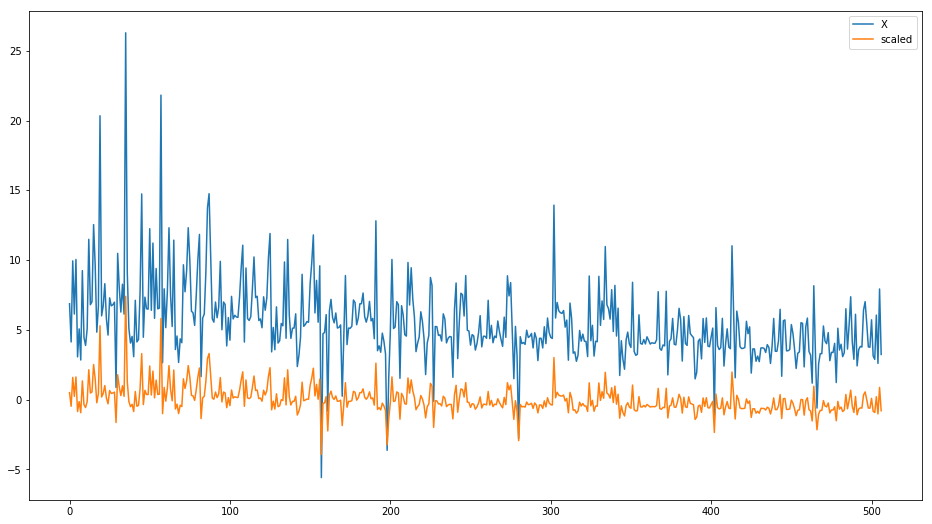

,Fecha corte,Subtipo Negocio,Principal / Compart.,Tipo Part. <sup>1<sup/>,Cons. id Part.,Núm. unidades,Valor unidad para las operaciones del día t,Valor fondo al cierre del día t,Núm. Invers.,Rentab. dia,Rentab. mes,Rentab. sem,Rentab. año
count,507,507,507,507.0,507.0,507,507,507,507.000000,5.070000e+02,507.000000,507.000000,507.000000
unique,507,1,1,NaN,NaN,481,507,507,NaN,NaN,NaN,NaN,NaN
top,2017-10-30 00:00:00,FIC DE TIPO GENERAL,Principal,NaN,NaN,"417,025,556.72","$27,209.94","$11,656,586,123,531.63",NaN,NaN,NaN,NaN,NaN
freq,1,507,507,NaN,NaN,4,1,1,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.0,0.0,NaN,NaN,NaN,446987.717949,-2.242344e-16,5.572042,6.076271,6.572762
std,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,33283.292361,1.000988e+00,1.473540,1.358454,0.963653
min,NaN,NaN,NaN,8.0,0.0,NaN,NaN,NaN,392772.000000,-3.932020e+00,3.761271,4.257855,4.595863
25%,NaN,NaN,NaN,8.0,0.0,NaN,NaN,NaN,416512.500000,-5.526319e-01,4.462153,4.679871,5.777701


In [7]:
import pandas as pd
from sklearn import preprocessing

report = pd.read_csv(data_path+"/profitability.csv")

report = report.drop_duplicates()

# Select only FIDUCUENTA
report = report[report['Nombre Negocio'].str.contains("FIDUCUENTA")]

# Drop columns
report = report. drop(columns=['Tipo Entidad', 'Cód. Entidad', 'Nombre Entidad', 'Cód. Negocio', 
                              'Nombre Negocio'], errors='ignore')

# Convert dates
report['Fecha corte'] = pd.to_datetime(report['Fecha corte'],infer_datetime_format=False)
report = report.sort_values(by=['Fecha corte'])
report = report.reset_index(drop=True)

# Convert to numbers
report['Rentab. dia'] = pd.to_numeric(report['Rentab. dia'])

# Normalize
scaler = preprocessing.StandardScaler()
x = report['Rentab. dia'].values
print(x.shape)
x = x.reshape(-1, 1)
print(x.shape)
x_scaled = scaler.fit_transform(x)
#print(scaler.mean_)
print(x_scaled.shape)

plt.figure(figsize=(16, 9))
plt.plot(x, label='X')
plt.plot(x_scaled, label='scaled')
plt.legend()
plt.show()

report['Rentab. dia'] = pd.DataFrame(x_scaled)



# Save to file
report.to_csv(data_path+"/report.csv", index=False, encoding="utf-8")


report.describe(include="all")

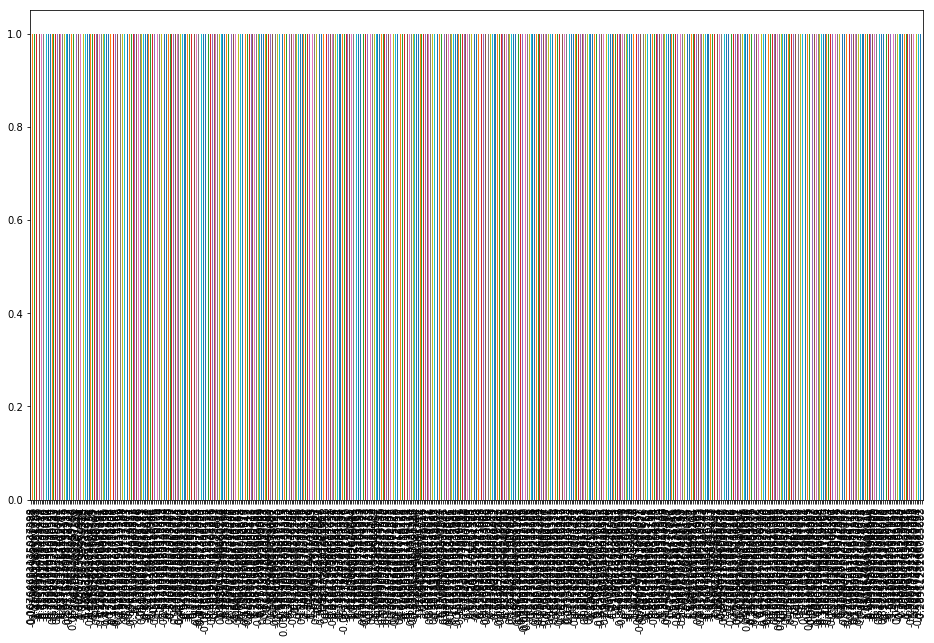

In [6]:
plt.figure(figsize=(16, 9))


report['Rentab. dia'].value_counts(dropna=False).plot.bar()